In [1]:
import pandas as pd

In [2]:
ar = pd.read_csv('Attrition.csv')

In [4]:
ar.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Handling Null

In [5]:
ar.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
ar.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
ar.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [10]:
ar.BusinessTravel.replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2},inplace=True)

In [12]:
ar.select_dtypes(include='object').columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [13]:
ar[ar.select_dtypes(include='object').columns] = ar[ar.select_dtypes(include='object').columns].apply(le.fit_transform)

In [15]:
ar.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
ar.select_dtypes(include='object').columns

Index([], dtype='object')

### Sampling

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
ar_train,ar_test = train_test_split(ar,test_size=0.2)

In [24]:
print(ar.shape," ",ar_train.shape," ",ar_test.shape)

(1470, 35)   (1176, 35)   (294, 35)


In [25]:
ar_train_x = ar_train.drop(['Attrition'],axis=1)
ar_train_y = ar_train.iloc[ : ,1]

In [27]:
ar_test_x = ar_test.drop(['Attrition'],axis=1)
ar_test_y = ar_test.iloc[ : ,1]

### Model Building

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [31]:
logreg.fit(ar_train_x,ar_train_y)

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [36]:
pred = logreg.predict(ar_test_x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix

In [38]:
tab = confusion_matrix(ar_test_y,pred)
tab

array([[247,   0],
       [ 47,   0]], dtype=int64)

### Accuracy

In [40]:
Accuracy  = tab.diagonal().sum()*100/tab.sum()
Accuracy

84.01360544217687

### Recall Score

In [41]:
from sklearn.metrics import recall_score

In [42]:
recall_score(ar_test_y,pred)*100

0.0

### Precision

In [43]:
from sklearn.metrics import precision_score

In [44]:
precision_score(ar_test_y,pred)*100

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

### F1 SCore

In [45]:
from sklearn.metrics import f1_score

In [47]:
f1_score(ar_test_y,pred)*100

0.0

### AuRoc

In [48]:
from sklearn.metrics import roc_auc_score,roc_curve

In [49]:
pred_prob = logreg.predict_proba(ar_test_x)
pred_prob

array([[0.731713  , 0.268287  ],
       [0.954472  , 0.045528  ],
       [0.69314467, 0.30685533],
       [0.93805809, 0.06194191],
       [0.9044213 , 0.0955787 ],
       [0.87604492, 0.12395508],
       [0.8742067 , 0.1257933 ],
       [0.91541772, 0.08458228],
       [0.91420874, 0.08579126],
       [0.92609201, 0.07390799],
       [0.94218982, 0.05781018],
       [0.93544191, 0.06455809],
       [0.87761413, 0.12238587],
       [0.97215223, 0.02784777],
       [0.89665582, 0.10334418],
       [0.58926908, 0.41073092],
       [0.69713091, 0.30286909],
       [0.91011164, 0.08988836],
       [0.88035639, 0.11964361],
       [0.79559796, 0.20440204],
       [0.92036459, 0.07963541],
       [0.92747117, 0.07252883],
       [0.85438253, 0.14561747],
       [0.8003931 , 0.1996069 ],
       [0.88975081, 0.11024919],
       [0.81537862, 0.18462138],
       [0.70892626, 0.29107374],
       [0.78621552, 0.21378448],
       [0.84331726, 0.15668274],
       [0.84927894, 0.15072106],
       [0.

In [50]:
roc_auc_score(ar_test_y,pred_prob[ : ,1])

0.7307261607373589

In [53]:
fpr, tpr, thresh = roc_curve(ar_test_y,pred_prob[ : ,1])

In [54]:
import matplotlib.pyplot as plt

Text(0.3, 0.5, 'Area under curve is 0.73')

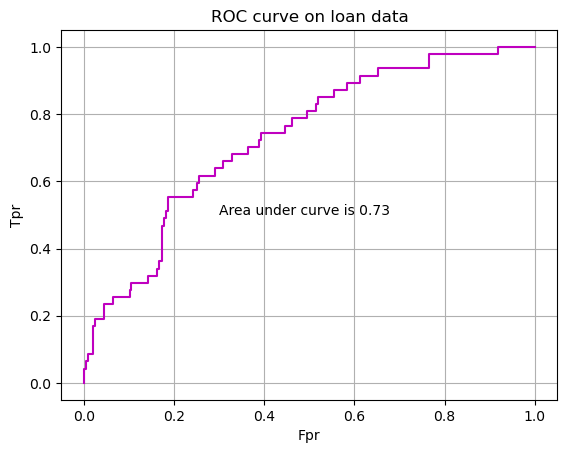

In [55]:
plt.plot(fpr,tpr, color = 'm')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC curve on loan data')
plt.grid()
plt.text(x=.3,y=.5,s = "Area under curve is 0.73")

### for class1 model is working good but 

### Model is not predicting those are intersted to leave the company

### overall model is not good